In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pol_regression(features_train, y_train, degree):
    
    parameters = np.zeros(degree+1)
    
    X = prepareMatrix(features_train, degree)
    
    M = X.transpose().dot(X) # Next, the X matrix is transposed, and the dot product calculated between X and X...
    B = X.transpose().dot(y_train) # and X and y_train. These create the values we will need in order to calculate the parameters.
    
    # To calculate the parameters, the equation ma=b is solved for x, with a=Xx and b=XY.
    
    Mdet = np.linalg.det(M) # The first step is to get the initial determinant - this will be used for calculating each x.
    
    for a in range(0, degree+1):
        Mi = M.copy() # Creating a copy of the data is necessary so we don't overwrite the initial M matrix. If we overwrote each step, we would slowly replace the entire M matrix with the b matrix, causing errors.
        Mi[:,a] = B # For each iteration, the corresponding column in Mi is replaced with the b matrix.
        Midet = np.linalg.det(Mi) # The determinant of the new Mi matrix is then calculated...
        parameters[a]=Midet / Mdet # ...and divided by the determinant of the original M matrix to give us our final result.
        
    return parameters

def prepareMatrix(features_train, degree):
    X = np.ones(features_train.shape) # First, the initial data matrix is created. It is in the same shape as the features_train array.
    for i in range(1,degree+1):
        X=np.column_stack((X, features_train**i)) # Each iteration, the x values are multiplied by the degree, and the resulting matrix stacked column-wise onto the data matrix.
    return X
    

def eval_pol_regression(parameters, x, y, degree):
    
    xp = prepareMatrix(x, degree)
    
    pred = xp.dot(parameters)
    sqdiff = (pred - y) ** 2
    
    mean = np.sum(sqdiff) / np.size(sqdiff)
    
    
    rmse = np.sqrt(mean)
    
    return rmse

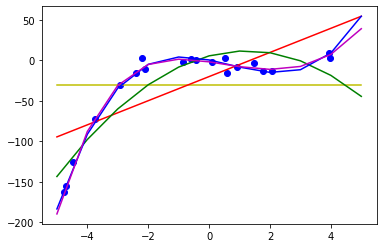

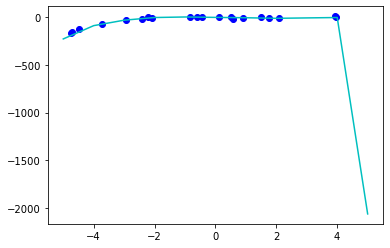

In [3]:
filename = 'Task1 - dataset - pol_regression(1).csv'
#filename = 'read.csv'

data = pd.read_csv(filename)


features_train = data['x']
y_train = data['y']

xt = np.linspace(-5, 5, 11)


plt.figure()
plt.plot(features_train, y_train, 'bo')

degree = 0
yt=np.zeros(11)
for i in range(0,11):
    yt[i] = y_train.sum()/y_train.size
plt.plot(xt, yt, 'y')

degree = 1
w = pol_regression(features_train, y_train, degree)
xt1 = prepareMatrix(xt, degree)
yt = xt1.dot(w)
plt.plot(xt, yt, 'r')

degree = 2
w = pol_regression(features_train, y_train, degree)
xt1 = prepareMatrix(xt, degree)
yt = xt1.dot(w)
plt.plot(xt, yt, 'g')

degree = 3
w = pol_regression(features_train, y_train, degree)
xt1 = prepareMatrix(xt, degree)
yt = xt1.dot(w)
plt.plot(xt, yt, 'b')

degree = 6
w = pol_regression(features_train, y_train, degree)
xt1 = prepareMatrix(xt, degree)
yt = xt1.dot(w)
plt.plot(xt, yt, 'm')

plt.figure()
plt.plot(features_train, y_train, 'bo')

degree = 10
w = pol_regression(features_train, y_train, degree)
xt1 = prepareMatrix(xt, degree)
yt = xt1.dot(w)
plt.plot(xt, yt, 'c')

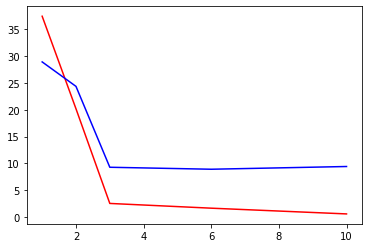

In [21]:
import sklearn.model_selection as sk

XTr, XTe, YTr, YTe = sk.train_test_split(features_train, y_train, train_size=0.7)

degrees = np.array([1, 2, 3, 6, 10])
length = degrees.size
rtr = np.zeros((length))
rte = np.zeros((length))
for i in range (0,length):
    degree = degrees[i]
    w = pol_regression(XTr, YTr, degree)
    rtr[i] = eval_pol_regression(w, XTr, YTr, degree)
    rte[i] = eval_pol_regression(w, XTe, YTe, degree)

    
plt.figure()
plt.plot(degrees, rtr, 'r')
plt.plot(degrees, rte, 'b')